In [2]:
import pandas as pd

In [5]:
from matplotlib import pyplot as plt

In [58]:
import os

In [59]:
import numpy as np

In [9]:
#what is my current directory
os.getcwd()

'/home/cdsw/01_future-sales/jupyter'

In [13]:
#change directory to 
os.chdir("/home/cdsw/01_future-sales/data")

In [16]:
os.chdir("/home/cdsw/01_future-sales/jupyter")

In [17]:
#can also list the directory in this call and find out what data we have-nice
os.listdir("/home/cdsw/01_future-sales/data")

['test.csv',
 'sales_train_v2.csv',
 'sample_submission.csv',
 'shops.csv',
 'items.csv',
 'item_categories.csv']

In [18]:
train=pd.read_csv("/home/cdsw/01_future-sales/data/sales_train_v2.csv")

In [19]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2935849 entries, 0 to 2935848
Data columns (total 6 columns):
date              object
date_block_num    int64
shop_id           int64
item_id           int64
item_price        float64
item_cnt_day      float64
dtypes: float64(2), int64(3), object(1)
memory usage: 134.4+ MB


In [21]:
train.head()

,date,date_block_num,shop_id,item_id,item_price,item_cnt_day
0,02.01.2013,0,59,22154,999.00,1.0
1,03.01.2013,0,25,2552,899.00,1.0
2,05.01.2013,0,25,2552,899.00,-1.0
3,06.01.2013,0,25,2554,1709.05,1.0
4,15.01.2013,0,25,2555,1099.00,1.0


In [27]:
#ok so there is limited information in the training set
#how many instances are there of any given date
oneday=train[train["date"]=="02.01.2013"]

In [28]:
oneday.shape

(6718, 6)

In [30]:
oneday.head()

,date,date_block_num,shop_id,item_id,item_price,item_cnt_day
0,02.01.2013,0,59,22154,999.0,1.0
6,02.01.2013,0,25,2565,549.0,1.0
28,02.01.2013,0,25,2546,299.0,1.0
33,02.01.2013,0,25,2715,899.0,1.0
35,02.01.2013,0,25,2716,149.0,1.0


In [35]:
#good so we know that there are multiple purchases per day
#firstly how many UNIQUE items are there in train
len(set(train.item_id))

21807

In [40]:
#check that this aligns with the information we have on items
items=pd.read_csv("/home/cdsw/01_future-sales/data/items.csv")
items.info()
#22170 entries vs 21807 the unique version in train - less we have to predict - might mean an error for a prediction later

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 22170 entries, 0 to 22169
Data columns (total 3 columns):
item_name           22170 non-null object
item_id             22170 non-null int64
item_category_id    22170 non-null int64
dtypes: int64(2), object(1)
memory usage: 519.7+ KB


In [43]:
print(items.head())
#names probably aren't going to be helpful - mybe the categories will be
len(set(items.item_category_id))

                                           item_name  item_id  \
0          ! ВО ВЛАСТИ НАВАЖДЕНИЯ (ПЛАСТ.)         D        0   
1  !ABBYY FineReader 12 Professional Edition Full...        1   
2      ***В ЛУЧАХ СЛАВЫ   (UNV)                    D        2   
3    ***ГОЛУБАЯ ВОЛНА  (Univ)                      D        3   
4        ***КОРОБКА (СТЕКЛО)                       D        4   

   item_category_id  
0                40  
1                76  
2                40  
3                40  
4                40  


84

In [45]:
cats=pd.read_csv("/home/cdsw/01_future-sales/data/item_categories.csv")
print(cats.head())
cats.info()

        item_category_name  item_category_id
0  PC - Гарнитуры/Наушники                 0
1         Аксессуары - PS2                 1
2         Аксессуары - PS3                 2
3         Аксессуары - PS4                 3
4         Аксессуары - PSP                 4
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 84 entries, 0 to 83
Data columns (total 2 columns):
item_category_name    84 non-null object
item_category_id      84 non-null int64
dtypes: int64(1), object(1)
memory usage: 1.4+ KB


In [46]:
#so the names aren't useful meaning that we can't think about the logical associations, so one thing we might need to do will 
#be to think about correlations of what are often bought together  - though how might that be put into a model?

In [52]:
#what is useful for now is to try to understand how much is bought and how they fit into different categories
#first from items and see how many items are in each category - then chart
per_cat=items.groupby(['item_category_id']).size().reset_index(name='counts')
print(per_cat.info())
per_cat.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 84 entries, 0 to 83
Data columns (total 2 columns):
item_category_id    84 non-null int64
counts              84 non-null int64
dtypes: int64(2)
memory usage: 1.4 KB
None


,item_category_id,counts
0,0,4
1,1,2
2,2,75
3,3,34
4,4,15


In [56]:
#can already see there is quite a range here - 
print("Mean Number of Items per Category is:", len(set(items.item_id))/84)

Mean Number of Items per Category is: 263.92857142857144


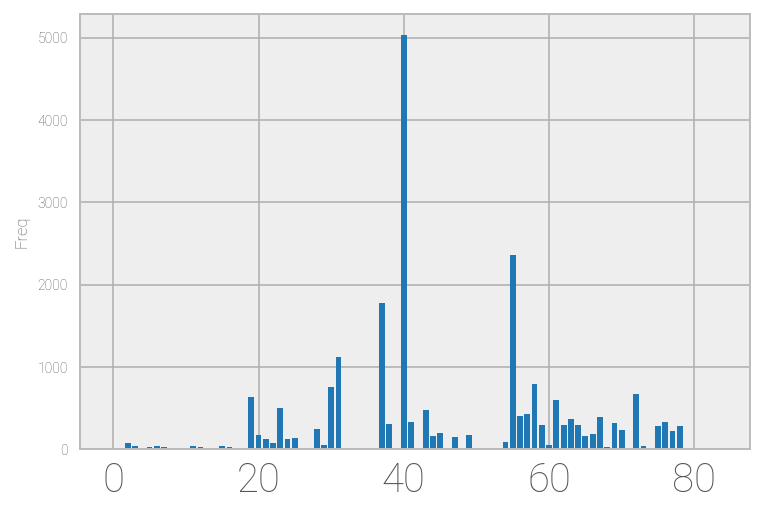

In [83]:
objects = per_cat.item_category_id
y_pos = np.arange(len(objects))
performance = per_cat.counts

#plt.bar(y_pos, performance, align='center', alpha=0.5)
plt.bar(y_pos, performance,align="center")
#plt.xticks(y_pos, objects)
plt.ylabel('Freq')
#plt.xticks(rotation=90)
plt.rc('xtick',labelsize=10)

plt.show()

In [90]:
#definitely some categories have more items than others
#second, link items to train and see what the sales volumes are
train2 = pd.merge(left=train,right=items, how='left', left_on='item_id', right_on='item_id')
print(train2.shape)
print(train.shape)
train2.head()

(2935849, 8)
(2935849, 6)


,date,date_block_num,shop_id,item_id,item_price,item_cnt_day,item_name,item_category_id
0,02.01.2013,0,59,22154,999.00,1.0,ЯВЛЕНИЕ 2012 (BD),37
1,03.01.2013,0,25,2552,899.00,1.0,DEEP PURPLE The House Of Blue Light LP,58
2,05.01.2013,0,25,2552,899.00,-1.0,DEEP PURPLE The House Of Blue Light LP,58
3,06.01.2013,0,25,2554,1709.05,1.0,DEEP PURPLE Who Do You Think We Are LP,58
4,15.01.2013,0,25,2555,1099.00,1.0,DEEP PURPLE 30 Very Best Of 2CD (Фирм.),56


In [95]:
#cool so no dups added - now group the data again
sales_per_cat= train2.groupby(['item_category_id'])['item_cnt_day'].sum().reset_index()
print(sales_per_cat.info())
sales_per_cat.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 84 entries, 0 to 83
Data columns (total 2 columns):
item_category_id    84 non-null int64
item_cnt_day        84 non-null float64
dtypes: float64(1), int64(1)
memory usage: 1.4 KB
None


,item_category_id,item_cnt_day
0,0,3.0
1,1,2.0
2,2,19597.0
3,3,29807.0
4,4,2407.0


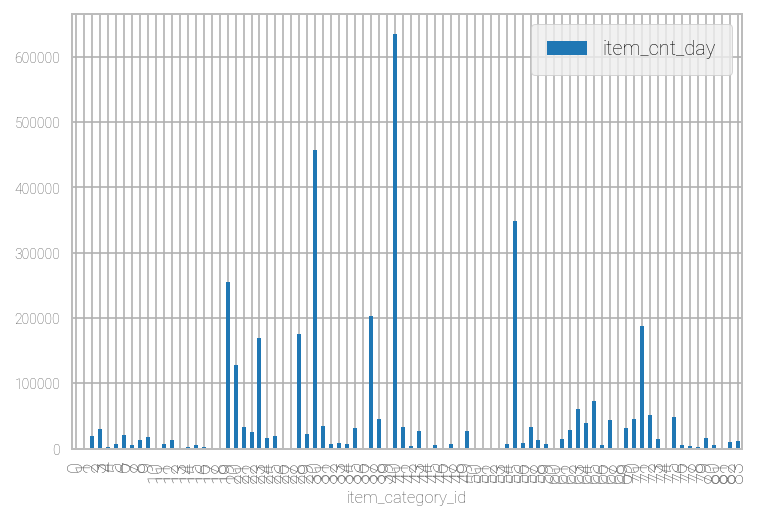

In [102]:
ax=sales_per_cat.plot(kind="bar",x="item_category_id",y="item_cnt_day")
ax.set_facecolor ("white")

In [ ]:
#not surprising that this represents the first chart - how to analyse if there are top products
#are there an average number of products? might expect the chart to change if volumes per prod were different but doesn't appear to be